In [ ]:
import pandas as pd
import glob
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df = pd.concat([pd.read_csv(file) for file in glob.glob('2022\*.csv')], ignore_index=True)

In [ ]:
df.count()

ride_id               895485
rideable_type         895485
started_at            895485
ended_at              895485
start_station_name    895475
start_station_id      895475
end_station_name      892281
end_station_id        892281
start_lat             895485
start_lng             895485
end_lat               893515
end_lng               893515
member_casual         895485
dtype: int64

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895485 entries, 0 to 895484
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             895485 non-null  object 
 1   rideable_type       895485 non-null  object 
 2   started_at          895485 non-null  object 
 3   ended_at            895485 non-null  object 
 4   start_station_name  895475 non-null  object 
 5   start_station_id    895475 non-null  object 
 6   end_station_name    892281 non-null  object 
 7   end_station_id      892281 non-null  object 
 8   start_lat           895485 non-null  float64
 9   start_lng           895485 non-null  float64
 10  end_lat             893515 non-null  float64
 11  end_lng             893515 non-null  float64
 12  member_casual       895485 non-null  object 
dtypes: float64(4), object(9)
memory usage: 88.8+ MB


In [ ]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])
df['start_lat']=pd.to_numeric(df['start_lat'])
df['start_lng']=pd.to_numeric(df['start_lng'])
df['end_lat']=pd.to_numeric(df['end_lat'])
df['end_lng']=pd.to_numeric(df['end_lng'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895485 entries, 0 to 895484
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             895485 non-null  object        
 1   rideable_type       895485 non-null  object        
 2   started_at          895485 non-null  datetime64[ns]
 3   ended_at            895485 non-null  datetime64[ns]
 4   start_station_name  895475 non-null  object        
 5   start_station_id    895475 non-null  object        
 6   end_station_name    892281 non-null  object        
 7   end_station_id      892281 non-null  object        
 8   start_lat           895485 non-null  float64       
 9   start_lng           895485 non-null  float64       
 10  end_lat             893515 non-null  float64       
 11  end_lng             893515 non-null  float64       
 12  member_casual       895485 non-null  object        
dtypes: datetime64[ns](2), float64

In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(column,":",unique_values)

ride_id : 895485
rideable_type : 3
started_at : 870490
ended_at : 869885
start_station_name : 84
start_station_id : 86
end_station_name : 320
end_station_id : 319
start_lat : 65811
start_lng : 68476
end_lat : 415
end_lng : 412
member_casual : 2


In [ ]:
for column in df.columns:
    nulls = df[column].isna().sum()
    print(column,":",nulls)

ride_id : 0
rideable_type : 0
started_at : 0
ended_at : 0
start_station_name : 10
start_station_id : 10
end_station_name : 3204
end_station_id : 3204
start_lat : 0
start_lng : 0
end_lat : 1970
end_lng : 1970
member_casual : 0


In [ ]:
df=df.dropna(subset=['end_station_id'])

for column in df.columns:
    nulls = df[column].isna().sum()
    print(column,":",nulls)


ride_id : 0
rideable_type : 0
started_at : 0
ended_at : 0
start_station_name : 0
start_station_id : 0
end_station_name : 0
end_station_id : 0
start_lat : 0
start_lng : 0
end_lat : 0
end_lng : 0
member_casual : 0


In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member


In [ ]:
df['started_at_Date'] = df['started_at'].dt.date
df['started_at_Time'] = df['started_at'].dt.time

In [ ]:
df['ended_at_Date'] = df['ended_at'].dt.date
df['ended_at_Time'] = df['ended_at'].dt.time

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_Date,started_at_Time,ended_at_Date,ended_at_Time
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,18:50:39,2022-01-26,18:51:53
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,13:14:07,2022-01-28,13:20:23
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,19:55:13,2022-01-10,20:00:37
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,07:54:57,2022-01-26,07:55:22
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,18:44:46,2022-01-13,18:45:43


In [ ]:
df['ride_duration']=df['ended_at']-df['started_at']

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_Date,started_at_Time,ended_at_Date,ended_at_Time,ride_duration
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,18:50:39,2022-01-26,18:51:53,0 days 00:01:14
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,13:14:07,2022-01-28,13:20:23,0 days 00:06:16
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,19:55:13,2022-01-10,20:00:37,0 days 00:05:24
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,07:54:57,2022-01-26,07:55:22,0 days 00:00:25
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,18:44:46,2022-01-13,18:45:43,0 days 00:00:57


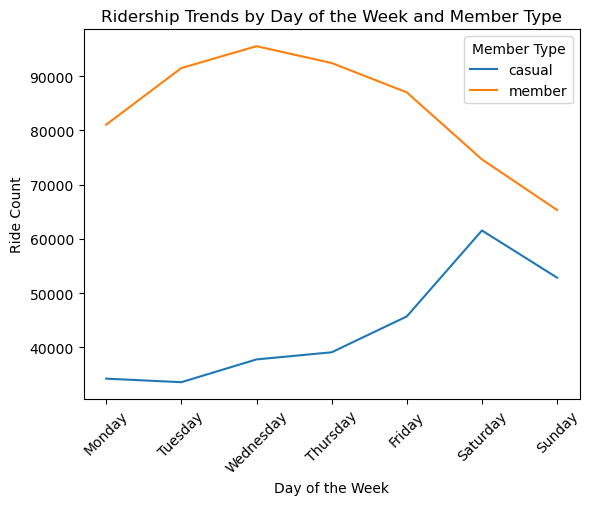

In [ ]:

df['day_of_week'] = df['started_at'].dt.dayofweek
df_lineplot=df.groupby(['day_of_week', 'member_casual']).size().reset_index(name='ride_count')

day_of_week_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sn.lineplot(x='day_of_week', y='ride_count', hue='member_casual', data=df_lineplot)
plt.title('Ridership Trends by Day of the Week and Member Type')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Count')
plt.xticks(range(7), day_of_week_labels, rotation=45)  # Set custom x-axis labels
plt.legend(title='Member Type')

plt.show()

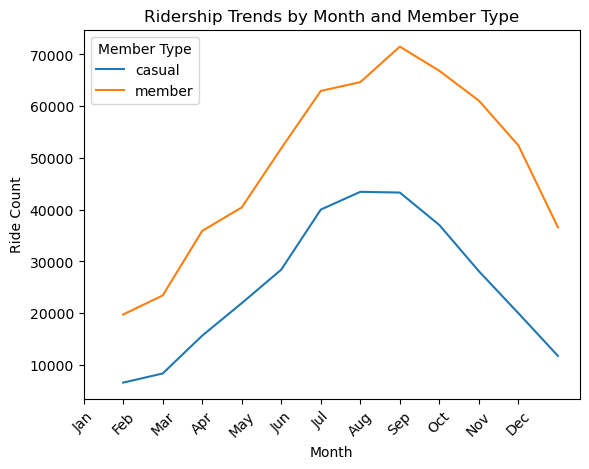

In [ ]:
df['month'] = df['started_at'].dt.month
df_lineplot=df.groupby(['month', 'member_casual']).size().reset_index(name='ride_count')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sn.lineplot(x='month', y='ride_count', hue='member_casual', data=df_lineplot)
plt.title('Ridership Trends by Month and Member Type')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.xticks(range(12), month_labels, rotation=45)  # Set custom x-axis labels
plt.legend(title='Member Type')

plt.show()

In [ ]:
df_lineplot=df.groupby(['start_station_id']).size().reset_index(name='start_count')
df_lineplot.head()

,start_station_id,start_count
0,HB101,30165
1,HB102,32899
2,HB103,34130
3,HB105,23214
4,HB201,17060


In [ ]:
df['end_station_id']

0         HB201
1         JC038
2         JC038
3         HB201
4         HB201
          ...  
895480    JC057
895481    HB105
895482    HB105
895483    HB105
895484    HB105
Name: end_station_id, Length: 892281, dtype: object

In [ ]:
dfx=df.head(1000)
df_endcount=df.groupby(['end_station_name']).size().reset_index(name='end_count')
df_f=pd.merge(dfx,df_endcount, on='end_station_name',how='left')

In [ ]:
df_f

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,end_count
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,17518
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,5989
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,5989
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,17518
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,17518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC4845EBD323AAC0,electric_bike,2022-01-21 19:16:09,2022-01-21 19:28:26,Washington St,JC098,Washington St,JC098,40.724294,-74.035483,40.724294,-74.035483,casual,15178
996,27B50A781BA35EC1,electric_bike,2022-01-21 19:13:47,2022-01-21 19:15:18,Washington St,JC098,Washington St,JC098,40.724294,-74.035483,40.724294,-74.035483,casual,15178
997,267E5B77F4A84902,classic_bike,2022-01-23 10:58:14,2022-01-23 18:17:59,Washington St,JC098,Washington St,JC098,40.724294,-74.035483,40.724294,-74.035483,casual,15178
998,9FB049FD16E6C577,electric_bike,2022-01-16 14:56:17,2022-01-16 14:57:56,Washington St,JC098,Washington St,JC098,40.724294,-74.035483,40.724294,-74.035483,casual,15178


In [ ]:
df_f['end_count'].isnull().sum()

0

In [ ]:
df['end_station_id'].nunique()

319

In [ ]:
#histogram on ride durations
#0-10,10-20,20-30,30-40,40-50,50-60,>60

In [ ]:
#Network graph showing the connections between stations based on the frequency of rides between them.
#top 10 routes based on start and end location

In [ ]:
#A geographic heatmap overlaying the station locations, with color intensity indicating station utilization (start and end counts)



In [ ]:
#pie chart based on rideable_type in %

In [ ]:
#duration of ride vs start station

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b3ba52ea-63b3-4a97-8b86-8764f764f060' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>